In [ ]:
import re
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
# import tensorflow as tf
from datetime import datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import textwrap
import matplotlib.pyplot as plt
from nltk import ngrams

from tqdm import tqdm
import copy
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

from sklearn.ensemble import RandomForestClassifier
import re
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import operator
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [ ]:
!wget -c https://s3.amazonaws.com/fast-ai-nlp/yelp_review_full_csv.tgz

--2022-06-27 22:39:38--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_full_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.173.232
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.173.232|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
# !gzip -d yelp_review_full_csv.tgz

In [ ]:
!tar -xvf "/content/yelp_review_full_csv.tar" -C "/content/yelp"

yelp_review_full_csv/
yelp_review_full_csv/train.csv
yelp_review_full_csv/readme.txt
yelp_review_full_csv/test.csv


In [ ]:
# Path to original datasets
# TRAIN_CSV = '/content/drive/MyDrive/Colab Notebooks/yelp_review_full_csv/train.csv'
# TEST_CSV = '/content/drive/MyDrive/Colab Notebooks/yelp_review_full_csv/test.csv'

TRAIN_CSV = '/content/yelp/yelp_review_full_csv/train.csv'
TEST_CSV = '/content/yelp/yelp_review_full_csv/test.csv'

# Path to filtered datasets after Data Cleaning process (can be used if you already have them)
TRAIN_CSV_FILTERED = '/content/drive/MyDrive/Colab Notebooks/yelp_review_full_csv/Yelp/clean_train_full.csv'
TEST_CSV_FILTERED = '/content/drive/MyDrive/Colab Notebooks/yelp_review_full_csv/Yelp/clean_test_full.csv'

# Path for bigram calculations
BIGRAMS_TXT = '/content/drive/MyDrive/Colab Notebooks/yelp_review_full_csv/bigrams.txt'

## 1: Data Preprocessing


In [ ]:
# read data from csv
cols = ['rating', 'original_data']
train_data = pd.read_csv(TRAIN_CSV, names=cols)
test_data = pd.read_csv(TEST_CSV, names=cols)

In [ ]:
train_data

,rating,original_data
0,5,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...
...,...,...
649995,5,I had a sprinkler that was gushing... pipe bro...
649996,1,Phone calls always go to voicemail and message...
649997,1,Looks like all of the good reviews have gone t...
649998,5,I was able to once again rely on Yelp to provi...


In [ ]:
# Details:

print("Shape of the dataset:")
print(train_data.shape)

# Column names
print("Column names:")
print(train_data.columns)

# Datatype of each column
print("Datatype of each column:")
print(train_data.dtypes)

# Few entries
print("Few entries:")
print(train_data.head())

# Dataset summary
train_data.describe(include='all')

Shape of the dataset:
(650000, 2)
Column names:
Index(['rating', 'original_data'], dtype='object')
Datatype of each column:
rating            int64
original_data    object
dtype: object
Few entries:
   rating                                      original_data
0       5  dr. goldberg offers everything i look for in a...
1       2  Unfortunately, the frustration of being Dr. Go...
2       4  Been going to Dr. Goldberg for over 10 years. ...
3       4  Got a letter in the mail last week that said D...
4       1  I don't know what Dr. Goldberg was like before...


,rating,original_data
count,650000.000000,650000
unique,NaN,650000
top,NaN,dr. goldberg offers everything i look for in a...
freq,NaN,1
mean,3.000000,NaN
std,1.414215,NaN
min,1.000000,NaN
25%,2.000000,NaN
50%,3.000000,NaN
75%,4.000000,NaN


In [ ]:
# pd.DataFrame(round(train_data.rating.value_counts(ascending=False, normalize=True),2))

,rating
5,0.2
2,0.2
4,0.2
1,0.2
3,0.2


In [ ]:
test_data['clean_data'] = test_data['original_data']
train_data['clean_data'] = train_data['original_data']

In [ ]:
train_data.head(2)
# test_data.head(2)

,rating,original_data,clean_data
0,5,dr. goldberg offers everything i look for in a...,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go...","Unfortunately, the frustration of being Dr. Go..."


In [ ]:
train_data.describe(include='all')

,rating,original_data,clean_data
count,650000.000000,650000,650000
unique,NaN,650000,650000
top,NaN,dr. goldberg offers everything i look for in a...,dr. goldberg offers everything i look for in a...
freq,NaN,1,1
mean,3.000000,NaN,NaN
std,1.414215,NaN,NaN
min,1.000000,NaN,NaN
25%,2.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,4.000000,NaN,NaN


As we can see in above results of 'descibe' the unique values are comparatively lesser in clean_data column than original_data, so we must have some duplicates that needs to be dropped.

In [ ]:
train_data.drop_duplicates(subset=['clean_data'], inplace=True)
train_data

,rating,original_data,clean_data
0,5,dr. goldberg offers everything i look for in a...,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go...","Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...,I don't know what Dr. Goldberg was like before...
...,...,...,...
649995,5,I had a sprinkler that was gushing... pipe bro...,I had a sprinkler that was gushing... pipe bro...
649996,1,Phone calls always go to voicemail and message...,Phone calls always go to voicemail and message...
649997,1,Looks like all of the good reviews have gone t...,Looks like all of the good reviews have gone t...
649998,5,I was able to once again rely on Yelp to provi...,I was able to once again rely on Yelp to provi...


In [ ]:
train_data.dropna(inplace=True)
train_data

,rating,original_data,clean_data
0,5,dr. goldberg offers everything i look for in a...,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go...","Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...,I don't know what Dr. Goldberg was like before...
...,...,...,...
649995,5,I had a sprinkler that was gushing... pipe bro...,I had a sprinkler that was gushing... pipe bro...
649996,1,Phone calls always go to voicemail and message...,Phone calls always go to voicemail and message...
649997,1,Looks like all of the good reviews have gone t...,Looks like all of the good reviews have gone t...
649998,5,I was able to once again rely on Yelp to provi...,I was able to once again rely on Yelp to provi...


In [ ]:
# Count all NaN in a DataFrame (both columns & Rows)
def check_nan(data):  
  return data.isnull().sum().sum()

In [ ]:
check_nan(train_data)

0

In [ ]:
# A small train dataset as it is too heavy and takes long and hence it depends on memory allocation
# trimmed_train_data = train_data[:10000]
trimmed_train_data = train_data

## 2: Data Cleaning



We can see there are a lot of punctuation marks like fullstop(.), comma(,), new line (\n) and so on and we need to remove it.

Many ways of doing it: Regex, Spacy, nltk, import punctuation from string.

Here is a list of all the punctuation marks that needs to be removed 
```
(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)
```


In [ ]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')
stemmer = SnowballStemmer("english")
# stop_words = set(stopwords.words("english"))
stop_words = set(stopwords.words('english')) - set(['no', 'not']) # Since negative words going to play big role here

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
if 'not' in stop_words:
  print("yes")

Not removing punctuation as the words that are negations (like don't, won't etc.) plays a big role in deciding the ratings of the reviews. So below method is for expansion of those contractions.

In [ ]:
## Function for replacing contractions with normal words
def contractions(sent):
    sent = re.sub(r"ain't", "am not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"aren't", "are not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"can't", "can not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"can't've", "can not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"'cause", "because", sent, flags=re.IGNORECASE)
    sent = re.sub(r"could've", "could have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"couldn't", "could not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"couldn't've", "could not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"doesn't", "does not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"hadn't", "had not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"hadn't've", "had not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"hasn't", "has not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"haven't", "have not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"he'd", "he had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"he'd've", "he would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"he'll", "he will", sent, flags=re.IGNORECASE)
    sent = re.sub(r"he'll've", "he will have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"he's", "he has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"how'd", "how did", sent, flags=re.IGNORECASE)
    sent = re.sub(r"how'd'y", "how do you", sent, flags=re.IGNORECASE)
    sent = re.sub(r"how'll", "how will", sent, flags=re.IGNORECASE)
    sent = re.sub(r"how's", "how has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i'd", "i had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i'd've", "i would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i'll", "i shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i'll've", "i shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i'm", "i am", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i've", "i have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"isn't", "is not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"it'd", "it had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"it'd've", "it would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"it'll", "it shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"it'll've", "it shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"it's", "it has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"let's", "let us", sent, flags=re.IGNORECASE)
    sent = re.sub(r"ma'am", "madam", sent, flags=re.IGNORECASE)
    sent = re.sub(r"mayn't", "may not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"might've", "might have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"mightn't", "might not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"mightn't've", "might not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"must've", "must have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"mustn't", "must not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"mustn't've", "must not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"needn't", "need not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"needn't've", "need not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"o'clock", "of the clock", sent, flags=re.IGNORECASE)
    sent = re.sub(r"oughtn't", "ought not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"oughtn't've", "ought not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"shan't", "shall not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"sha'n't", "shall not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"shan't've", "shall not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"she'd", "she had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"she'd've", "she would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"she'll", "she shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"she'll've", "she shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"she's", "she has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"should've", "should have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"shouldn't", "should not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"shouldn't've", "should not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"so've", "so have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"so's", "so as", sent, flags=re.IGNORECASE)
    sent = re.sub(r"that'd", "that would", sent, flags=re.IGNORECASE)
    sent = re.sub(r"that'd've", "that would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"that's", "that has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"there'd", "there had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"there'd've", "there would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"there's", "there has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they'd", "they had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they'd've", "they would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they'll", "they shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they'll've", "they shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they're", "they are", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they've", "they have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"to've", "to have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"wasn't", "was not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we'd", "we had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we'd've", "we would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we'll", "we will", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we'll've", "we will have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we're", "we are", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we've", "we have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"weren't", "were not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"what'll", "what shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"what'll've", "what shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"what're", "what are", sent, flags=re.IGNORECASE)
    sent = re.sub(r"what's", "what has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"what've", "what have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"when's", "when has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"when've", "when have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"where'd", "where did", sent, flags=re.IGNORECASE)
    sent = re.sub(r"where's", "where has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"where've", "where have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"who'll", "who shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"who'll've", "who shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"who's", "who has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"who've", "who have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"why's", "why has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"why've", "why have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"will've", "will have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"won't", "will not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"won't've", "will not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"would've", "would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"wouldn't", "would not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"wouldn't've", "would not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"y'all", "you all", sent, flags=re.IGNORECASE)
    sent = re.sub(r"y'all'd", "you all would", sent, flags=re.IGNORECASE)
    sent = re.sub(r"y'all'd've", "you all would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"y'all're", "you all are", sent, flags=re.IGNORECASE)
    sent = re.sub(r"y'all've", "you all have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you'd", "you had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you'd've", "you would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you'll", "you shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you'll've", "you shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"how's", "how has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you're", "you are", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you've", "you have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"didn't", "did not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"don't", "do not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"'","",sent, flags=re.IGNORECASE)
    sent = re.sub(r". . .","",sent, flags=re.IGNORECASE)
    return(sent)

Function for removing unwanted texts like digits, digit patterns etc.


In [ ]:
def processing(data_1):
 
    for index, row in tqdm(data_1.iterrows()):
        stri = ""
        sent = ""

# Code to remove digit with word pattern
        cle = re.sub(r'([\d]+[a-zA-Z]+)|([a-zA-Z]+[\d]+)', "", row["clean_data"])

## Code to remove only digit patter
        cle = re.sub(r"(^|\s)(\-?\d+(?:\.\d)*|\d+|[\d]+[A-Za-z]+)"," ", cle)

## Code for concatinating strings
        stri = stri + cle

## Code for calling contraction function
        stri = contractions(stri)
        
        stri = clean(stri)
        lemmatizer = WordNetLemmatizer()
        
        for e in str(stri).split():
            e = lemmatizer.lemmatize(e, pos ="a")
            sent = ' '.join([sent,e])
        data_1["clean_data"][index] = sent

    return(data_1)

One thing to note here is that we are not converting the data to small case as there are few words (like NOT GOOD etc.) in the dataset that play big role in deciding the ratings. And, so we are handling that in below function while stemming.

Below is the function to handle whitespaces, tags, stemming etc.

In [ ]:
def clean(text):
  """
      - remove any html tags (< /br> often found)
      - Keep only ASCII + European Chars and whitespace, no digits
      - remove single letter chars
      - convert all whitespaces (tabs etc.) to single wspace
      - remove stopwords, punctuation and stemm
  """
  RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
  RE_TAGS = re.compile(r"<[^>]+>")
  RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
  RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
  RE_SPECIALSYMBOLS = re.compile(r"[^A-Za-z\']+", re.IGNORECASE)

  text = re.sub(RE_TAGS, " ", text)
  text = re.sub(RE_ASCII, " ", text)
  text = re.sub(RE_SINGLECHAR, " ", text)
  text = re.sub(RE_WSPACE, " ", text)
  text = re.sub(RE_SPECIALSYMBOLS, " ", text)

  word_tokens = word_tokenize(text)
  words_filtered = [
        stemmer.stem(word) if not word.isupper() else word for word in word_tokens if word.lower() not in stop_words
    ]
  text_clean = " ".join(words_filtered)
  
  return text_clean

In [ ]:
def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  words_filtered = [word for word in word_tokens if word.lower() not in stop_words]
  text_clean = " ".join(words_filtered)
  return text_clean

In [ ]:
## Calling the above function "processing" to clean the text 
clean_test_data = processing(test_data)
clean_train_data = processing(trimmed_train_data)

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
10000it [00:44, 223.09it/s]


In [ ]:
# clean_test_data.head(5)
clean_train_data.head(5)

Removing the stopwords from the final dataframe as it has been observed that some time in some rows few stopwords are present. so make it completely clean, we call it once more after lemmatization.
Also, after so many processing there are chances of null values in the last column and hence we must drop those rows.

In [ ]:
# Before dropping NaN
print(clean_train_data.shape)
print(clean_test_data.shape)

# Dropping nans
clean_train_data.dropna(inplace=True)
clean_test_data.dropna(inplace=True)

# After dropping NaN
print(clean_train_data.shape)
print(clean_test_data.shape)

# Dropping original data column and renaming the other column for both train/test for easiness while saving to csv later
clean_train_data.drop(columns=['original_data'], inplace = True)
clean_train_data.rename(columns = {'clean_data':'reviews'}, inplace = True)

clean_test_data.drop(columns=['original_data'], inplace = True)
clean_test_data.rename(columns = {'clean_data':'reviews'}, inplace = True)

In [ ]:
clean_train_data

,rating,original_data,clean_data
0,5,dr. goldberg offers everything i look for in a...,dr goldberg offer everythinook iener practitio...
1,2,"Unfortunately, the frustration of being Dr. Go...",unfortun frustrat dr goldberg patient iepeat e...
2,4,Been going to Dr. Goldberg for over 10 years. ...,go dr goldberg yearshina one patient start MHM...
3,4,Got a letter in the mail last week that said D...,goetter mail last week said dr goldberg move a...
4,1,I don't know what Dr. Goldberg was like before...,not know dr goldberg like move arizona let tel...
...,...,...,...
9995,5,Just seemed to be renovated because I stayed t...,seem renov becaustay likiffer place halat scre...
9996,4,"Extremely well run ! Great breakfast , clean r...",extrem well rureat breakfaslean room anespect ...
9997,2,A modern shopping experience (back in the 80s)...,modern shop experi back ni paiisit deforest pi...
9998,2,Not impressed. The prices here seem to keep go...,not impress price seem keep go noth chang stor...


In [ ]:
clean_train_data.to_csv(TRAIN_CSV_FILTERED, index=False) 

In [ ]:
clean_test_data.to_csv(TEST_CSV_FILTERED, index=False)

## 3: Data Visualization

---



In [ ]:
train_data_cleaned = pd.read_csv(TRAIN_CSV_FILTERED)
train_data_cleaned.dropna(inplace=True)
train_data_cleaned

,rating,reviews
0,5,dr goldberg offer everythinook iener practitio...
1,2,unfortun frustrat dr goldberg patient iepeat e...
2,4,go dr goldberg yearshina one patient start MHM...
3,4,goetter mail last week said dr goldberg move a...
4,1,not know dr goldberg like move arizona let tel...
...,...,...
648219,5,haprinkl gush pipe broken way ground turn ead ...
648220,1,phone call alway go voicemail messag not retur...
648221,1,look like good review gone head place jason ry...
648222,5,abl reli yelp provid need respons leak sprinkl...



*  Notice the number of records above ( < 650k) as there were nans which have been 

In [ ]:
# A new column 'length' for the number of words in the clean_data
train_data_cleaned['length'] = train_data_cleaned['reviews'].astype(str).apply(len)
train_data_cleaned

,rating,reviews,length
0,5,dr goldberg offer everythinook iener practitio...,288
1,2,unfortun frustrat dr goldberg patient iepeat e...,357
2,4,go dr goldberg yearshina one patient start MHM...,244
3,4,goetter mail last week said dr goldberg move a...,146
4,1,not know dr goldberg like move arizona let tel...,622
...,...,...,...
648219,5,haprinkl gush pipe broken way ground turn ead ...,163
648220,1,phone call alway go voicemail messag not retur...,63
648221,1,look like good review gone head place jason ry...,259
648222,5,abl reli yelp provid need respons leak sprinkl...,251


A comparison to test how much the length of texts affects the ratings:

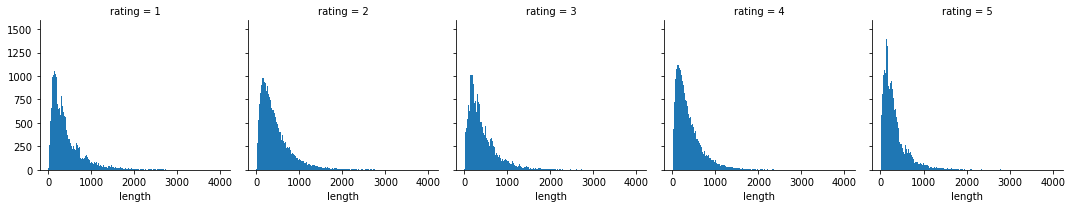

In [ ]:
graph = sns.FacetGrid(data=train_data_cleaned,col='rating')
graph.map(plt.hist,'length',bins=1000)

 

* Basically, from the graph it can be seen that for all the ratings, the reviews containing 300-500 words has the largest contribution in the decision of star rating. That is, for each of the ratings, the number of reviews containing 300-500 words are the highest.

In [ ]:
# Function for plotting the count plots
def plot_countplot(data):
    sns.catplot(x="rating", kind="count", palette="ch:.65", data= data).set(title='Bar Chart representing the distribution of Target Label')

# Function for plotting histograms
def plot_histogram(data,x,y,t):

    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(7,5))
    plt.hist(data, bins=50, color = "tab:blue")
    ax.set_title(t)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
# Function to get unigram word frequencies of the text
def plot_wordfrequencies(text):
    word_dict = {}

    for i in text:
        for j in str(i).split():
            if j not in word_dict.keys():
                word_dict[j] = 1
            else:
                word_dict[j] += 1
    cd = sorted(word_dict.items(),key=operator.itemgetter(1),reverse=True)
    word_df = pd.DataFrame(cd[0:40],
                    columns=['Word', 'Frequency'])
    word_df = word_df.set_index('Word')
    return(word_df)

def write_reviews_to_text(data):
  text = data.tolist()
  with open(BIGRAMS_TXT, 'w') as f:
    for l in text:
      f.write(str(l))

sentences = []
df_frequency = []

# Function frequency: counts the frequency of the each "n-gram" output  # Parameter grammed: it takes the function "n_gram"s return as value. Briefly, the grammed text.
def frequency(grammed):
    sentences.clear()
    df_frequency.clear()
    freq = nltk.FreqDist(grammed)
    for k, v in freq.items():
        sentences.append(k)   
        df_frequency.append(v) 


# Function n_gram: splits the words in order to given parameter  # Parameter n: it's the "n" number for "n-gram"
def n_gram(n, data):
    write_reviews_to_text(data)
    text = open(BIGRAMS_TXT, 'r').read()
    n_grams = ngrams(text.split(), n)
    return n_grams


# Function to get Bigram word frequencies   
def create_plot_bigrams(num, data):
    frequency(n_gram(num,data))            
    gram_frame = pd.DataFrame(sentences)     
    gram_frame['frequencies'] = df_frequency
    gram_frame.columns = ['first', 'second', 'frequencies']
    gram_frame.sort_values("frequencies", axis=0, ascending=False, inplace=True, na_position='last')
    gram_frame = gram_frame.head(20)           
    total = sum(df_frequency)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    grams = gram_frame["first"] + " " + gram_frame["second"]

    # Create plot
    y_pos = np.arange(len(grams))
    performance = gram_frame["frequencies"]
    ax.barh(y_pos, performance)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(grams)
    ax.invert_yaxis()  
    ax.set_xlabel('Frequency')
    ax.set_title('bigrams')

    plt.show()
    display(gram_frame)

    
#  function for plotting barcharts
def plot_barchart(data_df,x,y,z):
    jk = data_df.plot.bar(rot= 90,figsize=(20,5), color = "tab:blue", title = z, label = "Word Frequencies")
    jk.set_xlabel(x)
    jk.set_ylabel(y)
    


In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

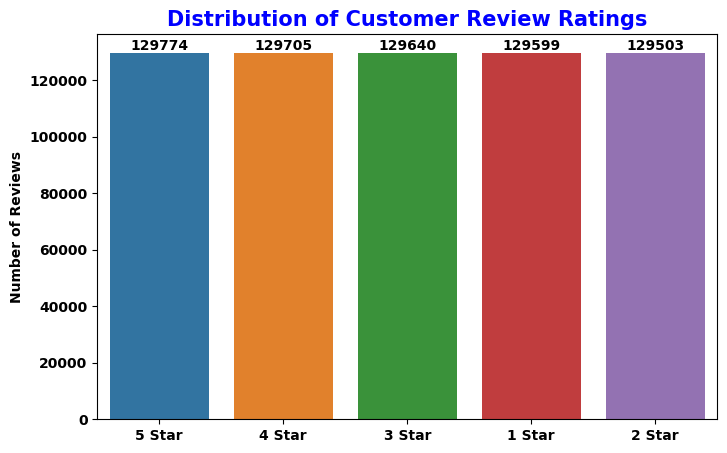

In [ ]:
review_sub_rating = count_values_in_column(train_data_cleaned,"rating")

plt.figure(figsize=(8,5),dpi=100),
plt.style.use('default')
stars=["5 Star","4 Star","3 Star","1 Star","2 Star"]
ax = sns.barplot(x=stars, y="Total", data=review_sub_rating)
plt.title("Distribution of Customer Review Ratings", weight="bold", c="blue", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Number of Reviews",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')
plt.show()



*   As we know this is almost(few records got removed having nans) an uniform dataset with all the classes containing equal records.


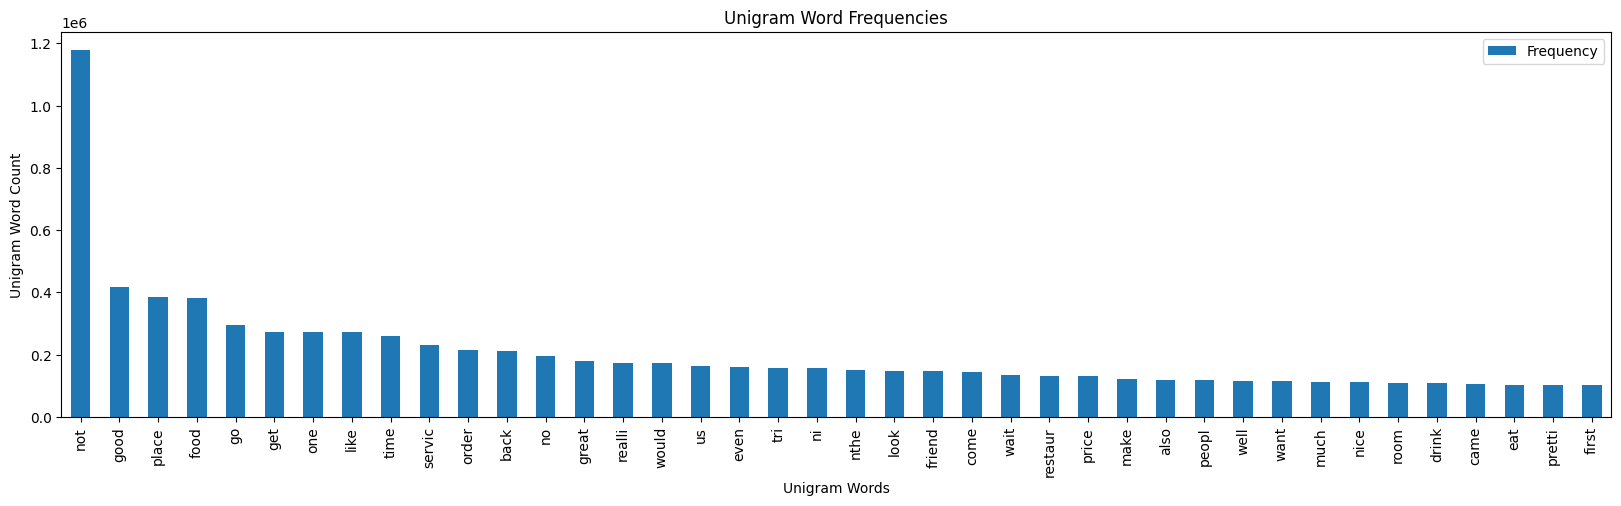

In [ ]:
# Calling the above function to calculate the unigram word frequeicies of the reviews
word_df = plot_wordfrequencies(train_data_cleaned["reviews"])

# Calling the above function to plot the bar plot of top unigram words of reviews
plot_barchart(word_df,x = "Unigram Words", y = "Unigram Word Count", z = "Unigram Word Frequencies")



*   This was obvious as these words represent more of sentiments and hence more in numbers. Also the highest occurence comes for 'not' which is almost 120k times in the dataset.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



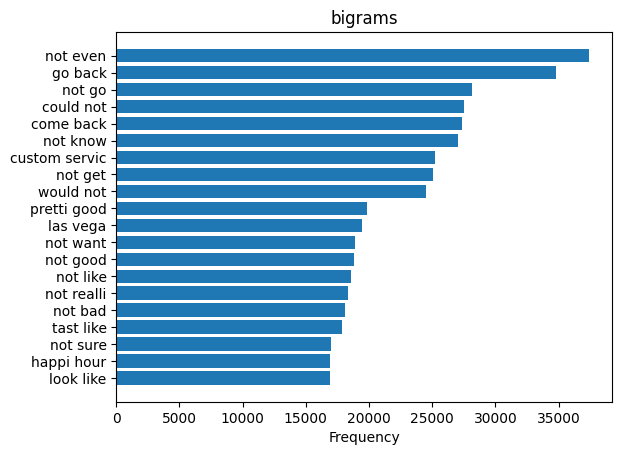

,first,second,frequencies
1582,not,even,37373
1587,go,back,34819
2261,not,go,28122
1541,could,not,27494
1815,come,back,27364
1675,not,know,27013
687,custom,servic,25246
77,not,get,25077
376,would,not,24476
4521,pretti,good,19849


In [ ]:
# Callling function to plot bigrams
create_plot_bigrams(2,train_data_cleaned["reviews"] )



*   As expected with the sentiments, the most frequent bigrams involve more of 'good' and 'not' and emotion words like sure, pretty etc.


In [ ]:
data_vi = train_data_cleaned

In [ ]:
def plot_words_unigram(vis_index,freq,t,a,b):
    f, ax= plt.subplots(2,2,figsize=(15,5))
    ax = plt.subplot(111)
    index1, index2, index3, index4, index5 = vis_index
    freq1, freq2, freq3, freq4, freq5 = freq
    
    ## Plot multi-variate barcharts for the reviews 
    ax.bar(index1,freq1, width=0.5, color='tab:blue', align='center', label = "Rating 5")
    ax.bar(index2,freq2, width=0.5, color='tab:cyan', align='center', label = "Rating 4")
    ax.bar(index3,freq3, width=0.5, color='tab:red', align='center', label = "Rating 3")
    ax.bar(index4,freq4, width=0.5, color='tab:green', align='center', label = "Rating 2")
    ax.bar(index5,freq5, width=0.5, color='tab:purple', align='center', label = "Rating 1")
    plt.xticks(rotation=90)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(t)
    plt.legend()

    plt.show()

In [ ]:
## Separting the reviews and getting the unigram words and their frequencies
word_vis1 = plot_wordfrequencies(data_vi.loc[data_vi['rating'] == 5, "reviews"])
word_vis2 = plot_wordfrequencies(data_vi.loc[data_vi['rating'] == 4, "reviews"])
word_vis3 = plot_wordfrequencies(data_vi.loc[data_vi['rating'] == 3, "reviews"])
word_vis4 = plot_wordfrequencies(data_vi.loc[data_vi['rating'] == 2, "reviews"])
word_vis5 = plot_wordfrequencies(data_vi.loc[data_vi['rating'] == 1, "reviews"])

In [ ]:
vis_index=(word_vis1.index,word_vis2.index,word_vis3.index,word_vis4.index,word_vis5.index)
freq=(word_vis1["Frequency"],word_vis2["Frequency"],word_vis3["Frequency"],word_vis4["Frequency"],word_vis5["Frequency"])

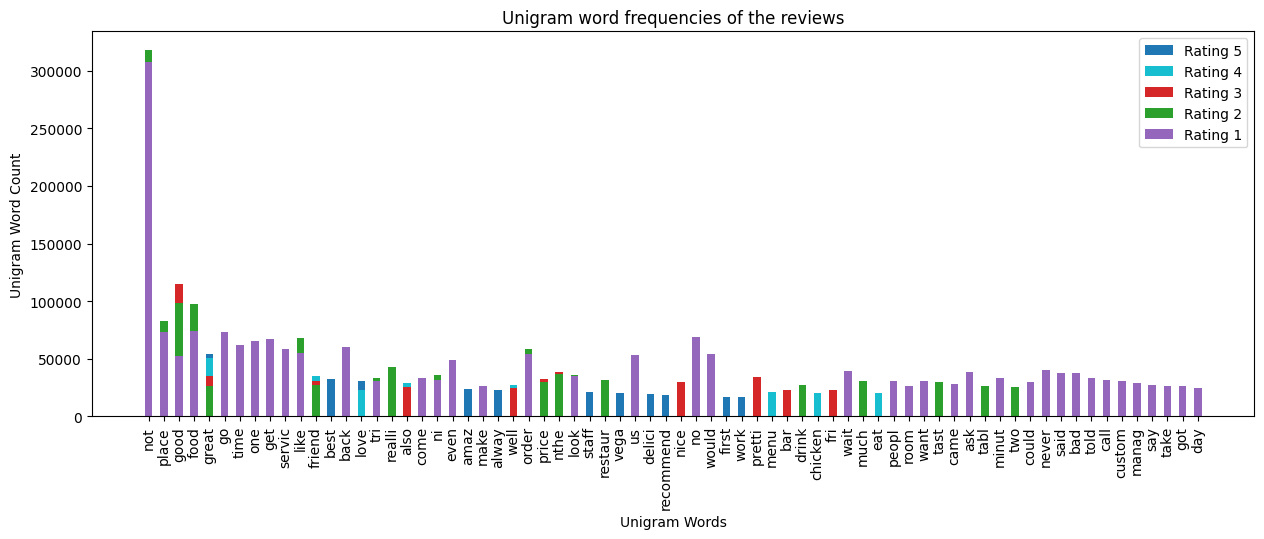

In [ ]:
# For a better comparison of all the unigrams found earlier 
plot_words_unigram(vis_index,freq, t = "Unigram word frequencies of the reviews",a="Unigram Words",b="Unigram Word Count")



*   The above plot shows the bar chart for the frequent unigram words for all the ratings.
*   We can see that the top words used are "not", "food", "place", which is obvious as these indicate different kind of emotions while rating negative something.
*   Similarly, 'good' is seen equally in both reviews because it can be written as 'good'(rating=3) or 'not good'(rating=1).
*   This tells us we are proceeding in right direction and our data has been cleaned and filtered properly.

#4: Model Training and Evaluation

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

import tensorflow_hub as hub
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=facdf30a547d12786b8c5f07ab524784f004e3d52cce317c385cf915e774a5db
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from langdetect import detect
import os

In [ ]:
train_data_cleaned = pd.read_csv(TRAIN_CSV_FILTERED)
test_data = pd.read_csv(TEST_CSV_FILTERED)
train_data_cleaned.dropna(inplace=True)
train_data_cleaned

,rating,reviews
0,5,dr goldberg offer everythinook iener practitio...
1,2,unfortun frustrat dr goldberg patient iepeat e...
2,4,go dr goldberg yearshina one patient start MHM...
3,4,goetter mail last week said dr goldberg move a...
4,1,not know dr goldberg like move arizona let tel...
...,...,...
648219,5,haprinkl gush pipe broken way ground turn ead ...
648220,1,phone call alway go voicemail messag not retur...
648221,1,look like good review gone head place jason ry...
648222,5,abl reli yelp provid need respons leak sprinkl...


**Adding sentiments:**

In [ ]:
# Adding Sentiment Columns
train_data_cleaned.loc[train_data_cleaned['rating'] == 3, 'sentiment'] = 'neutral' 
train_data_cleaned.loc[train_data_cleaned['rating'] < 3, 'sentiment'] = 'negative' 
train_data_cleaned.loc[train_data_cleaned['rating'] > 3, 'sentiment'] = 'positive' 
train_data_cleaned = train_data_cleaned[["reviews", "rating","sentiment"]]
train_data_cleaned.head(5)

,reviews,rating,sentiment
0,dr goldberg offer everythinook iener practitio...,5,positive
1,unfortun frustrat dr goldberg patient iepeat e...,2,negative
2,go dr goldberg yearshina one patient start MHM...,4,positive
3,goetter mail last week said dr goldberg move a...,4,positive
4,not know dr goldberg like move arizona let tel...,1,negative


In [ ]:
positive = len(train_data_cleaned[train_data_cleaned["sentiment"]=="positive"])
negative = len(train_data_cleaned[train_data_cleaned["sentiment"]=="negative"])
neutral = len(train_data_cleaned[train_data_cleaned["sentiment"]=="neutral"])

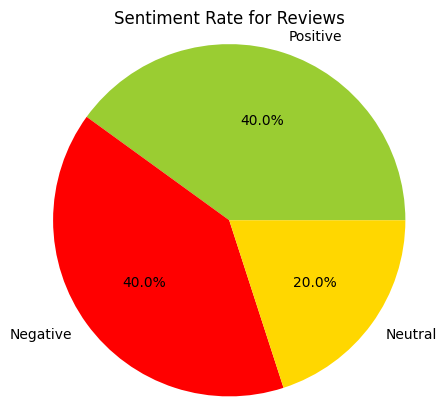

In [ ]:
pie_sentiment = train_data_cleaned.sentiment.value_counts(normalize=True)
plt.figure(figsize=(5,5),dpi=100),
labels = 'Positive','Negative',"Neutral"
colors = ['yellowgreen', 'red','gold']
plt.pie(pie_sentiment, colors=colors,labels=labels,autopct='%1.1f%%')
plt.style.use('default')
plt.title('Sentiment Rate for Reviews')
plt.axis('equal')
sizes = [positive, neutral, negative]
plt.show()

In [ ]:
# num_of_categories = 129500  # Set the number of records for each label that will be used for training
num_of_categories = 1000 

In [ ]:
## subsetting the dataset, considering that the size of dataset is large, execution is taking time if more rows are included specially at the stage of model building, training, testing and execution 

part1_data_sample = train_data_cleaned.groupby('rating').sample(n=num_of_categories, random_state=1)   # taking random data entries from each of the rating group
part1_data_sample.reset_index(inplace=True,drop=True)
# part1_data_sample.head(10)
part1_data_sample

,reviews,rating,sentiment
0,tri restauranew time friend disappoint everi t...,1,negative
1,current stay aniter not even room comp buefini...,1,negative
2,oh disappoint ad not back penguin sinc close l...,1,negative
3,not even bother go guest list wait hour half h...,1,negative
4,would not busi law firm even last traffic tick...,1,negative
...,...,...,...
4995,best thaav ever sucumm close privat parti not ...,5,positive
4996,ooiss lot thing phoenix dutch bros top list no...,5,positive
4997,place locat scottsdal soon enter lot feel like...,5,positive
4998,oka sick thaog witold visit vega thank last ev...,5,positive


In [ ]:
for index, row in part1_data_sample['reviews'].iteritems():
    lang = detect(row) #detecting each row
    part1_data_sample.loc[index, 'Language'] = lang
part1_data_sample.head()

,reviews,rating,sentiment,Language
0,tri restauranew time friend disappoint everi t...,1,negative,en
1,current stay aniter not even room comp buefini...,1,negative,en
2,oh disappoint ad not back penguin sinc close l...,1,negative,en
3,not even bother go guest list wait hour half h...,1,negative,en
4,would not busi law firm even last traffic tick...,1,negative,en


In [ ]:
data=part1_data_sample.copy()

In [ ]:
data = data[data["Language"]=="en"]
len(data)

4887

In [ ]:
data

,reviews,rating,sentiment,Language
0,tri restauranew time friend disappoint everi t...,1,negative,en
1,current stay aniter not even room comp buefini...,1,negative,en
2,oh disappoint ad not back penguin sinc close l...,1,negative,en
3,not even bother go guest list wait hour half h...,1,negative,en
4,would not busi law firm even last traffic tick...,1,negative,en
...,...,...,...,...
4995,best thaav ever sucumm close privat parti not ...,5,positive,en
4996,ooiss lot thing phoenix dutch bros top list no...,5,positive,en
4997,place locat scottsdal soon enter lot feel like...,5,positive,en
4998,oka sick thaog witold visit vega thank last ev...,5,positive,en


## Sklearn models:

In [ ]:
# Split the data into X and y data sets
X = data.reviews
y = data.sentiment

In [ ]:

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_test

3508    positive
81      negative
1800    negative
827     negative
2946     neutral
          ...   
1628    negative
3745    positive
1527    negative
1995    negative
750     negative
Name: sentiment, Length: 1467, dtype: object

In [ ]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer()

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

# pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).sample(10)

In [ ]:
# The second document-term matrix has both unigrams and bigrams, and indicators instead of counts
cv2 = CountVectorizer(ngram_range=(1,2), binary=True)

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

# pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

### Logistic Regression:

In [ ]:
# Create a logistic regression model to use
lr = LogisticRegression()
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)
print("lr confusion matrix: \n\n", confusion_matrix(y_test, y_pred_cv1))

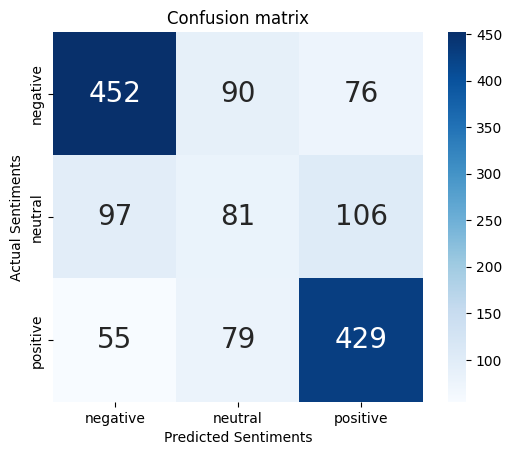

Accuracy: 65.67%
Precision: 64.83%
Recall: 65.67%
F1 Score: 65.17%


In [ ]:
# Print confusion matrix for lr
confusion = confusion_matrix(y_test, y_pred_cv1)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv1)
f1 = f1_score(y_test, y_pred_cv1,average='weighted')
precision = precision_score(y_test, y_pred_cv1,average='weighted')
recall = recall_score(y_test, y_pred_cv1,average='weighted')
cm1 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

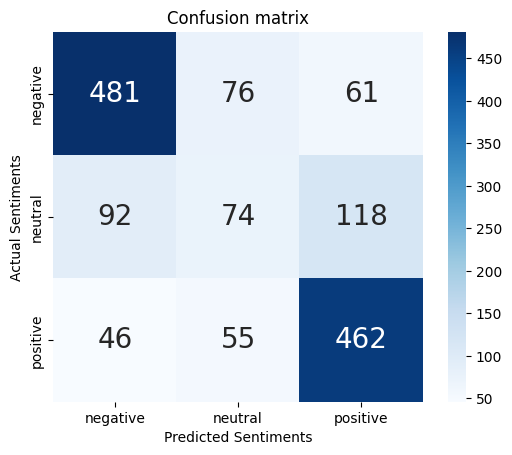

Accuracy: 69.42%
Precision: 67.48%
Recall: 69.42%
F1 Score: 68.17%


In [ ]:
# Train the second model
lr = LogisticRegression()
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)


# Print confusion matrix for lr
confusion = confusion_matrix(y_test, y_pred_cv2)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

# Print Sklearn Metrices
accuracy = accuracy_score(y_test, y_pred_cv2)
f1 = f1_score(y_test, y_pred_cv2,average='weighted')
precision = precision_score(y_test, y_pred_cv2,average='weighted')
recall = recall_score(y_test, y_pred_cv2,average='weighted')
cm2 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR1-CV', 'LR2-CV-Ngr']
round(results,3)

,LR1-CV,LR2-CV-Ngr
Accuracy,0.657,0.694
Precision,0.648,0.675
Recall,0.657,0.694
F1 Score,0.652,0.682


### Naive Bayes:

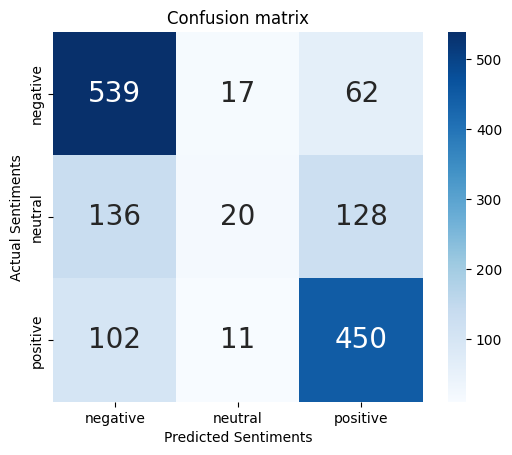

Accuracy: 68.87%
Precision: 64.36%
Recall: 68.87%
F1 Score: 63.68%


In [ ]:
# Fit the first Naive Bayes model

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)
y_pred_cv1_nb = mnb.predict(X_test_cv1)

# Print confusion matrix for kNN
confusion = confusion_matrix(y_test, y_pred_cv1_nb)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

# Print Sklearn Metrices
accuracy = accuracy_score(y_test, y_pred_cv1_nb)
f1 = f1_score(y_test, y_pred_cv1_nb,average='weighted')
precision = precision_score(y_test, y_pred_cv1_nb,average='weighted')
recall = recall_score(y_test, y_pred_cv1_nb,average='weighted')
cm3 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

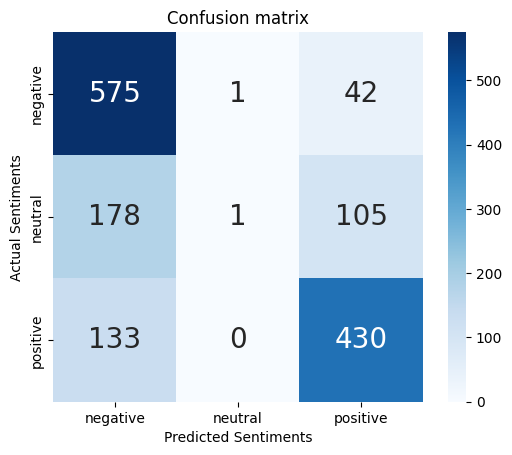

Accuracy: 68.67%
Precision: 65.71%
Recall: 68.67%
F1 Score: 61.38%


In [ ]:
# Fit the second Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = mnb.predict(X_test_cv2)

confusion = confusion_matrix(y_test, y_pred_cv2_nb)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv2_nb)
f1 = f1_score(y_test, y_pred_cv2_nb,average='weighted')
precision = precision_score(y_test, y_pred_cv2_nb,average='weighted')
recall = recall_score(y_test, y_pred_cv2_nb,average='weighted')
cm4 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm3, cm4)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB1-CV', 'NB2-CV-Ngr']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LR1-CV,LR2-CV-Ngr,NB1-CV,NB2-CV-Ngr
Accuracy,0.656655,0.694198,0.688737,0.686689
Precision,0.648321,0.674759,0.643615,0.657091
Recall,0.656655,0.694198,0.688737,0.686689
F1 Score,0.651738,0.681663,0.636846,0.613819


### KNN:

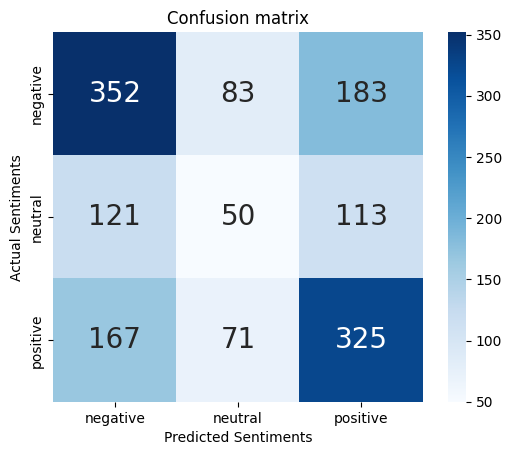

Accuracy: 49.62%
Precision: 48.07%
Recall: 49.62%
F1 Score: 48.68%


In [ ]:
# Fit the first KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_cv1, y_train)

y_pred_cv1_knn = knn.predict(X_test_cv1)

confusion = confusion_matrix(y_test, y_pred_cv1_knn)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv1_knn)
f1 = f1_score(y_test, y_pred_cv1_knn,average='weighted')
precision = precision_score(y_test, y_pred_cv1_knn,average='weighted')
recall = recall_score(y_test, y_pred_cv1_knn,average='weighted')
cm5 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))


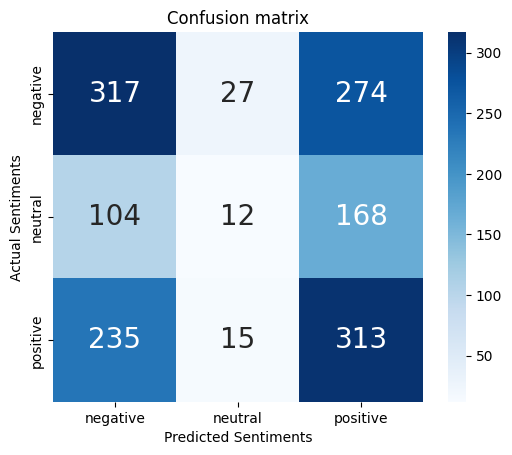

Accuracy: 43.82%
Precision: 40.62%
Recall: 43.82%
F1 Score: 40.62%


In [ ]:
# Fit the second KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_cv2, y_train)

y_pred_cv2_knn = knn.predict(X_test_cv2)

confusion = confusion_matrix(y_test, y_pred_cv2_knn)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv2_knn)
f1 = f1_score(y_test, y_pred_cv2_knn,average='weighted')
precision = precision_score(y_test, y_pred_cv2_knn,average='weighted')
recall = recall_score(y_test, y_pred_cv2_knn,average='weighted')
cm6 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

### Decision Tree:

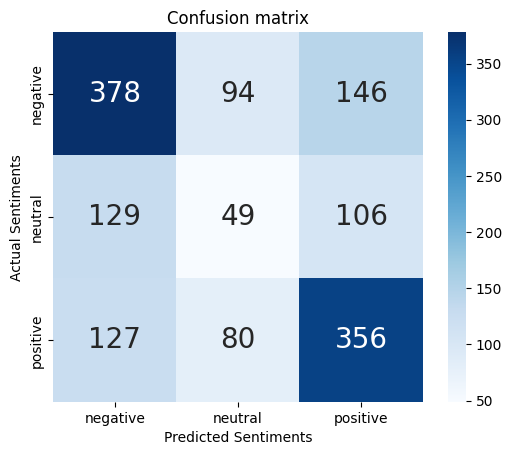

Accuracy: 53.45%
Precision: 51.91%
Recall: 53.45%
F1 Score: 52.59%


In [ ]:
# Fit the first Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train_cv1, y_train)

y_pred_cv1_dt = dt.predict(X_test_cv1)

confusion = confusion_matrix(y_test, y_pred_cv1_dt)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv1_dt)
f1 = f1_score(y_test, y_pred_cv1_dt,average='weighted')
precision = precision_score(y_test, y_pred_cv1_dt,average='weighted')
recall = recall_score(y_test, y_pred_cv1_dt,average='weighted')
cm7 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

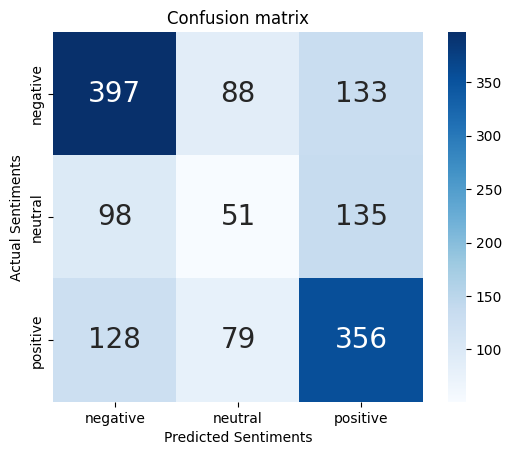

Accuracy: 54.88%
Precision: 53.34%
Recall: 54.88%
F1 Score: 53.98%


In [ ]:
# Fit the second Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train_cv2, y_train)

y_pred_cv2_dt = dt.predict(X_test_cv2)

confusion = confusion_matrix(y_test, y_pred_cv2_dt)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv2_dt)
f1 = f1_score(y_test, y_pred_cv2_dt,average='weighted')
precision = precision_score(y_test, y_pred_cv2_dt,average='weighted')
recall = recall_score(y_test, y_pred_cv2_dt,average='weighted')
cm8 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

### Comparison of sklearn models:

In [ ]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log1 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_cv1, y_train)
    name = clf.__class__.__name__
    
    #print("="*30)
    #print(name)
    
    train_predictions = clf.predict(X_test_cv1)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')
    #print("Accuracy: {:.2%}".format(accuracy))
    #print("Precision: {:.2%}".format(precision))
    #print("Recall: {:.2%}".format(recall))
    #print("F1 Score: {:.2%}".format(f1))

    #train_predictions = clf.predict_proba(X_test_cv1)
    #ll = log_loss(y_test, train_predictions)
    #print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, "CountVectorizer",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log1 = log1.append(log_entry)
#print("="*30)
round(log1,3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,CountVectorizer,66.871,66.096,66.871,66.405
0,KNeighborsClassifier,CountVectorizer,50.988,48.895,50.988,48.987
0,DecisionTreeClassifier,CountVectorizer,54.806,53.732,54.806,54.196
0,RandomForestClassifier,CountVectorizer,65.985,64.842,65.985,59.148
0,AdaBoostClassifier,CountVectorizer,63.054,60.537,63.054,60.882
0,GradientBoostingClassifier,CountVectorizer,66.258,61.654,66.258,62.154
0,MultinomialNB,CountVectorizer,69.052,65.179,69.052,63.000
0,BernoulliNB,CountVectorizer,56.578,54.194,56.578,50.830


## NNs:

In [ ]:
shuffled = data.reindex(np.random.permutation(data.index))
e = shuffled[shuffled['sentiment'] == 'positive'][:num_of_categories]
b = shuffled[shuffled['sentiment'] == 'negative'][:num_of_categories]
t = shuffled[shuffled['sentiment'] == 'neutral'][:num_of_categories]
# m = shuffled[shuffled['rating'] == 4][:num_of_categories]
# q = shuffled[shuffled['rating'] == 5][:num_of_categories]
# concated = pd.concat([e,b,t,m,q], ignore_index=True)

concated = pd.concat([e,b,t], ignore_index=True)

#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0

In [ ]:
# #One-hot encode the lab
concated.loc[concated['sentiment'] == 'positive', 'LABEL'] = 0
concated.loc[concated['sentiment'] == 'negative', 'LABEL'] = 1
concated.loc[concated['sentiment'] == 'neutral', 'LABEL'] = 2
# concated.loc[concated['rating'] == 4, 'LABEL'] = 3
# concated.loc[concated['rating'] == 5, 'LABEL'] = 4

# print(concated['LABEL'][:10])

labels = to_categorical(concated['LABEL'], num_classes=3)
print(labels[:10])

# if "rating" or "sentiment" or	"Language" in concated.keys():
#     concated.drop(['rating'], axis=1)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
concated

,reviews,rating,sentiment,Language,LABEL
2217,new place realli nice haot room wait staff nic...,3,neutral,en,2
2541,pleas note thaa complet sober visit unlik last...,3,neutral,en,2
232,terrif valu friend help peopl nfirstent ikea b...,5,positive,en,0
1371,fatbug locat insid santa fe station none floor...,1,negative,en,1
1477,mayb custard good slow placav ever entir life ...,1,negative,en,1
...,...,...,...,...,...
763,youroc wednesday BEST danc floor pretti small ...,4,positive,en,0
2931,not realli like huge corpor store need aris en...,3,neutral,en,2
2706,burger realli good fresh ingredi fri ok patti ...,3,neutral,en,2
1054,expect ohour diner food pretti good servic pre...,2,negative,en,1


In [ ]:
# Take last 500 records for test data
test_data = concated[-500:]
test_data.shape

(500, 5)

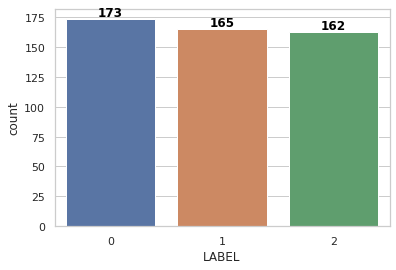

In [ ]:
# Check the data is not skewed and contains all classes

sns.set_theme(style="whitegrid")
ax = sns.countplot(x="LABEL",  data=test_data)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')

In [ ]:
# Check if concated has the right shape after assigning to test data
concated = concated[:concated.shape[0] - 500]
concated.shape

(2478, 5)

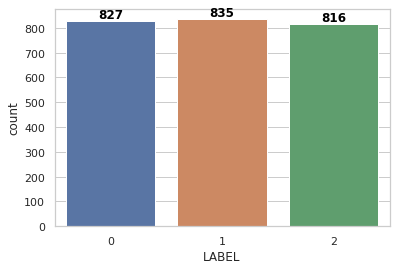

In [ ]:
# Confirm it contains all the classes
ax = sns.countplot(x="LABEL",  data=concated)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')

In [ ]:
X = concated.reviews
X

2217    new place realli nice haot room wait staff nic...
2541    pleas note thaa complet sober visit unlik last...
232     terrif valu friend help peopl nfirstent ikea b...
1371    fatbug locat insid santa fe station none floor...
1477    mayb custard good slow placav ever entir life ...
                              ...                        
2552     enjoy hous brew coffe server slow seem visit way
519     eaten twice previous one imperi palac strip ti...
547     best neighborhood bar restaur ave come leaseca...
795     place total wonder giveomplimentari upgrad tug...
1808    tonight never ni alway happili paid pizza eat ...
Name: reviews, Length: 2478, dtype: object

In [ ]:
y = labels[:labels.shape[0] - 500]
y.shape

(2478, 3)

In [ ]:
from collections import Counter
Counter(" ".join(concated["reviews"]).split()).most_common(5000)[-1]

('iowa', 3)

In [ ]:
n_most_common_words = 5000  # Decided from above where we see the last of 5000 words which occur for 20 times in the dataset
max_len = 40  # This we had found in the visualization for each of the ratings that max len of reviews contributing the highest lies between 300-500
epochs = 20
emb_dim = 40
batch_size = 256

In [ ]:
tokenizer = Tokenizer(num_words=n_most_common_words)
tokenizer.fit_on_texts(concated['reviews'].values)
sequences = tokenizer.texts_to_sequences(concated['reviews'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=max_len)

Found 22480 unique tokens.


In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X , labels, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X , y, test_size=0.25, random_state=42)
validation_data = (X_val, y_val)
# validation_data = (X_test, y_test)

In [ ]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
# Function for evaluating accuracy of the model validation data
def eval_accuracy(model):
  accr = model.evaluate(X_val, y_val)
  print('Val set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

**1st Model - With LSTM**

In [ ]:
# Build a LSTM model with output layer as the number of classes (5)

model_lstm = Sequential()
model_lstm.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model_lstm.add(SpatialDropout1D(0.7))
model_lstm.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

print(model_lstm.summary())

history_lstm = model_lstm.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=validation_data,
                    callbacks=[EarlyStopping(monitor='val_loss',patience=6, min_delta=0.0001)]
                    )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 40, 40)            200000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 40, 40)           0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 64)                26880     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 227,075
Trainable params: 227,075
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
8/8 [==============================] - 4s 158ms/step - loss: 1.0996 - acc: 0.3159 - val_loss: 1.09

In [ ]:
eval_accuracy(model_lstm)

20/20 [==============================] - 0s 7ms/step - loss: 0.8024 - acc: 0.6774
Val set
  Loss: 0.802
  Accuracy: 0.677


**2nd Model - Simple one without LSTM**

In [ ]:
# Build a simple model without lstm
model_simple = tf.keras.Sequential([
  layers.Embedding(n_most_common_words + 1, emb_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(3)])

model_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model_simple.summary())

history_simple = model_simple.fit(X_train, y_train, 
                           epochs=epochs, 
                           batch_size=batch_size,
                           validation_data=validation_data,
                           callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)]
                           )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 40)          200040    
                                                                 
 dropout_2 (Dropout)         (None, None, 40)          0         
                                                                 
 global_average_pooling1d_1   (None, 40)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 123       
                                                                 
Total params: 200,163
Trainable params: 200,163
Non-trainable params: 0
________________________________________________

In [ ]:
eval_accuracy(model_simple)

20/20 [==============================] - 0s 1ms/step - loss: 2.7992 - acc: 0.1629
Val set
  Loss: 2.799
  Accuracy: 0.163


**3rd Model - with simple RNN:**

In [ ]:
model_rnn = tf.keras.Sequential()
model_rnn.add(layers.Embedding(n_most_common_words + 1, emb_dim))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model_rnn.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model_rnn.add(layers.SimpleRNN(128))

model_rnn.add(layers.Dense(3))

# model.summary()
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model_rnn.summary())

history_rnn = model_rnn.fit(X_train, y_train, 
                           epochs=epochs, 
                           batch_size=batch_size,
                           validation_data=validation_data,
                           callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)]
                           )

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 40)          200040    
                                                                 
 gru (GRU)                   (None, None, 256)         228864    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               49280     
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 478,571
Trainable params: 478,571
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
8/8 [==============================] - 6s 410ms/step - loss: 1.9757 - acc: 0.3321 - val_loss: 1.1403 - val_acc: 0.3145
Epoch 2/20
8/8 [=============================

In [ ]:
eval_accuracy(model_rnn)

20/20 [==============================] - 1s 30ms/step - loss: 1.1035 - acc: 0.3419
Val set
  Loss: 1.104
  Accuracy: 0.342


In [ ]:
# Function for plotting history of hte model
def plot_history(history, epochs, model):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss for {}'.format(model))
  plt.legend()

  plt.show()

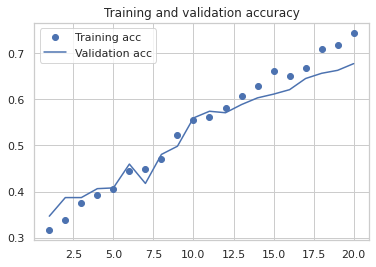

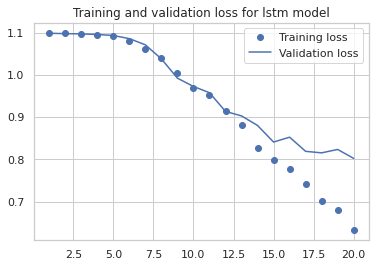

In [ ]:
plot_history(history_lstm, epochs, "lstm model")

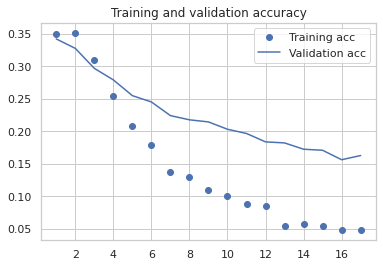

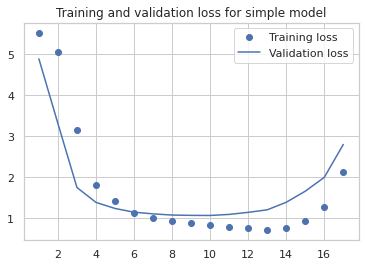

In [ ]:
plot_history(history_simple, epochs, "simple model")

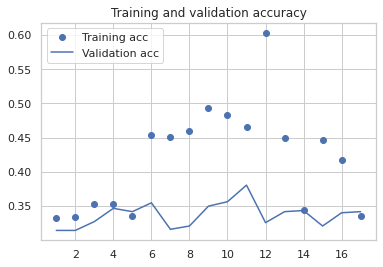

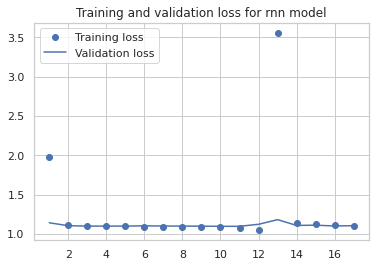

In [ ]:
plot_history(history_rnn, epochs, "rnn model")

**Model Prediciton and Evaluation for NNs:**

In [ ]:
# Function for making the predicitons on test set
def predictions(data, model):
  # labels = [1, 2, 3, 4, 5]
  labels = [0, 1, 2] 
  y_test = np.array([], dtype='i')
  y_pred = np.array([], dtype='i')
  reviews = data['reviews']
  rating = data['LABEL']

  for txt, gt_label in zip(reviews,rating):
    y_test = np.append(y_test, np.array([int(gt_label)]), 0)
    
    txt = [txt]
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded)

    # print(pred, labels[np.argmax(pred)])
    y_pred = np.append(y_pred, np.array([int(labels[np.argmax(pred)])]), 0)
  return y_test, y_pred

In [ ]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return({"TP":TP, "FP":FP, "TN":TN, "FN":FN})

In [ ]:
y_test, y_pred = predictions(test_data, model_lstm)

In [ ]:
y_test_sim, y_pred_sim = predictions(test_data, model_simple)

In [ ]:
y_test_rnn, y_pred_rnn = predictions(test_data, model_rnn)

---------------------LSTM---------------------
Precision Score of the model: 58.972458821856414
Recall Score of the model: 59.395150390654564
Acuracy score of the model: 59.599999999999994
F1 score of the model: 58.64556340249714
TPs and FPs:  {'TP': 122, 'FP': 86, 'TN': 112, 'FN': 54}


---------------------Simple---------------------
Precision Score of the model: 15.823099781860481
Recall Score of the model: 15.713028378410524
Acuracy score of the model: 15.8
F1 score of the model: 15.288496984867447
TPs and FPs:  {'TP': 33, 'FP': 178, 'TN': 32, 'FN': 169}


---------------------RNN---------------------
Precision Score of the model: 11.533333333333333
Recall Score of the model: 33.33333333333333
Acuracy score of the model: 34.599999999999994
F1 score of the model: 17.137196631996034
TPs and FPs:  {'TP': 0, 'FP': 0, 'TN': 173, 'FN': 327}




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


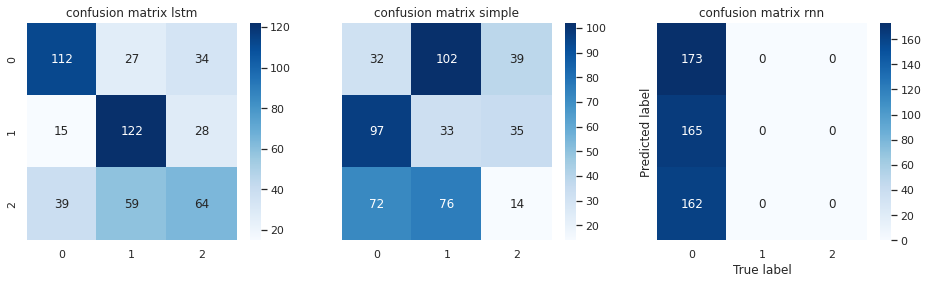

In [ ]:
# Function for evaluating models
import random
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, confusion_matrix, make_scorer
fig, ax =plt.subplots(1,3, sharex=True, sharey=True, figsize=(16,4))

cf_matrix_lstm = confusion_matrix(y_test,y_pred)
cf_matrix_simple = confusion_matrix(y_test_sim,y_pred_sim)
cf_matrix_rnn = confusion_matrix(y_test_rnn, y_pred_rnn)

sns.heatmap(cf_matrix_lstm, annot = True, fmt = 'd',cmap="Blues", ax=ax[0])
sns.heatmap(cf_matrix_simple, annot = True, fmt = 'd',cmap="Blues", ax=ax[1])
sns.heatmap(cf_matrix_rnn, annot = True, fmt = 'd',cmap="Blues", ax=ax[2])
ax[0].title.set_text('confusion matrix lstm')
ax[1].title.set_text('confusion matrix simple')
ax[2].title.set_text('confusion matrix rnn')
# plt.title('Heatmap of confusion matrix for Test data for lstm',)
plt.xlabel('True label')
plt.ylabel('Predicted label')

# print("TPs and FPs for lstm model: ",perf_measure(y_test, y_pred))


def model_metric(y_test,y_pred, model):
  print(f"---------------------{model}---------------------")
  print("Precision Score of the model:", precision_score(y_test,y_pred, average='macro')*100)
  print("Recall Score of the model:", recall_score(y_test,y_pred, average='macro')*100)
  print("Acuracy score of the model:",accuracy_score(y_test,y_pred)*100)
  print("F1 score of the model:",f1_score(y_test,y_pred, average='macro')*100)
  print("TPs and FPs: ",perf_measure(y_test,y_pred))
  print("\n")

model_metric(y_test,y_pred, "LSTM")
model_metric(y_test_sim, y_pred_sim, "Simple")
model_metric(y_test_rnn, y_pred_rnn, "RNN")



* Accuracy might look tempting but not a good metric in general. In multilabel classification, for each class we'll have f1 score, precision, recall values etc. We need to decide how to average them and the options are binary (which is the default one), micro, macro, weighted, samples. binary option needs positive and negative classes, and doesn't work in multilabel problems.
* To reiterate from sklearn documentation, micro option calculates TP, FP etc. globally, while macro does it specific to each class and averages them. weighted is the weighted version of macro average that accounts for class imbalance.

In [ ]:
all_data = data['reviews'].str.split(' ')
all_data.head()

0    [tri, restauranew, time, friend, disappoint, e...
1    [current, stay, aniter, not, even, room, comp,...
2    [oh, disappoint, ad, not, back, penguin, sinc,...
3    [not, even, bother, go, guest, list, wait, hou...
4    [would, not, busi, law, firm, even, last, traf...
Name: reviews, dtype: object

In [ ]:
all_data_cleaned = []

for text in all_data:
    text = [x.strip(string.punctuation) for x in text]
    all_data_cleaned.append(text)

all_data_cleaned[0]

text_data = [" ".join(text) for text in all_data_cleaned]
final_text_data = " ".join(text_data)
final_text_data[:500]

'tri restauranew time friend disappoint everi timem no long interest give thehot food sub par best price high ncase pointrder pancak ano not know possibl mess uancak abl serveancak cayenn pepper not warustom order food allergi anyon not smart beyond gross well never even offer replac pancak bring anyth els aubstitut whesk fomal biscuit told would not charg time thahreat pleas go back ashevill keep placem not sure charlott want embrac anan tell thaur not current stay aniter not even room comp buef'

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

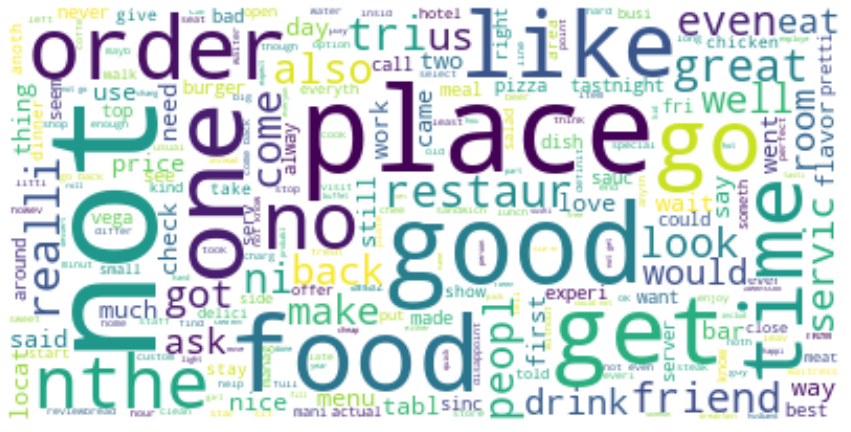

In [ ]:
wordcloud_spam = WordCloud(background_color="white", stopwords = stop_words,  max_words=250 ).generate(final_text_data)

plt.figure(figsize = (15,15))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()